In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/Users/yujing/miniconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [ ]:
data_path = "./RNA_DE"
cell_type1 = "MLI1"
cell_type2 = "MLI2"

In [ ]:
df = pd.read_csv(os.path.join(data_path, 
                              "deg_deseq2_ensemble_{}_{}.txt".format(cell_type1, cell_type2)), 
                 sep = "\t").reset_index().rename(columns = {"index" : "gene"})
df

FileNotFoundError: [Errno 2] No such file or directory: './annot/deg_deseq2_ensemble_MLI1_MLI2.txt'

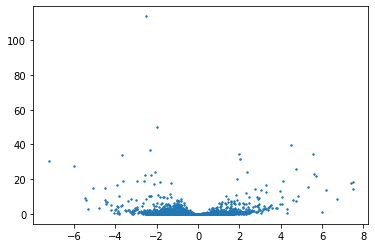

In [7]:
plt.scatter(df["log2FoldChange"], -np.log10(df["padj"]) , s = 2)

# use log fold change 2 / -2 as cuttoff

In [8]:
df[(df["padj"] < 0.01) & (df["log2FoldChange"] > 1)]

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
2,Adgrl3,27.222562,4.481079,0.321600,13.933716,3.952470e-44,1.501807e-40
4,Frmpd4,19.894972,1.994790,0.152946,13.042423,7.019020e-39,1.600196e-35
5,Grid1,8.488590,5.539619,0.428438,12.929790,3.056538e-38,5.806912e-35
7,Grid2,178.250975,2.024261,0.162635,12.446611,1.459105e-35,2.079042e-32
10,Galnt18,3.358862,4.741127,0.418139,11.338631,8.445566e-30,8.751909e-27
...,...,...,...,...,...,...,...
275,Gm44071,1.071497,1.826353,0.476805,3.830395,1.279375e-04,5.283912e-03
281,Lsm11,0.350654,1.832739,0.483307,3.792079,1.493913e-04,6.038694e-03
282,Aff1,4.074377,1.652622,0.436106,3.789499,1.509513e-04,6.074376e-03
297,Psd2,1.261515,1.809014,0.490284,3.689727,2.244944e-04,8.558568e-03


In [9]:
df[(df["padj"] < 0.01) & (df["log2FoldChange"] < -1)]

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Luzp2,29.918272,-2.504310,0.108122,-23.161871,1.103788e-118,1.258208e-114
1,Cntn6,8.908129,-1.973568,0.127000,-15.539884,1.863211e-54,1.061937e-50
3,Grin2b,6.978202,-2.342798,0.175274,-13.366472,9.493824e-41,2.705502e-37
6,Cadm1,10.212021,-3.664371,0.284962,-12.859136,7.642646e-38,1.244550e-34
8,Cdh22,4.813495,-7.234025,0.590692,-12.246704,1.749632e-34,2.216007e-31
...,...,...,...,...,...,...,...
303,Pdzd2,2.677188,-1.503503,0.408973,-3.676293,2.366473e-04,8.873497e-03
305,Jun,1.676741,-3.070612,0.836355,-3.671420,2.412061e-04,8.985323e-03
306,Agfg2,1.313943,-1.476118,0.403893,-3.654727,2.574556e-04,9.559402e-03
308,Eps8,4.490132,-1.493697,0.409462,-3.647953,2.643383e-04,9.751433e-03


# proceed with threshold 2 first

In [10]:
# check foldchange Granule cell marker gene
df[df["gene"].isin(["Lypd6", "Ppp1r17"])]
# fold change is calculated by granule / purkinje

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
526,Lypd6,0.860270,5.975862,2.080215,2.872714,0.004070,0.088026
7583,Ppp1r17,0.801908,-0.386294,0.854985,-0.451814,0.651403,0.978680


In [12]:
category = np.zeros(df.shape[0]).astype(object)
category[(df["padj"] < 0.01) & (df["log2FoldChange"] > 1)] = cell_type1
category[(df["padj"] < 0.01) & (df["log2FoldChange"] < -1)] = cell_type2

In [13]:
df["category"] = category
df.head()

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
0,Luzp2,29.918272,-2.504310,0.108122,-23.161871,1.103788e-118,1.258208e-114,MLI2
1,Cntn6,8.908129,-1.973568,0.127000,-15.539884,1.863211e-54,1.061937e-50,MLI2
2,Adgrl3,27.222562,4.481079,0.321600,13.933716,3.952470e-44,1.501807e-40,MLI1
3,Grin2b,6.978202,-2.342798,0.175274,-13.366472,9.493824e-41,2.705502e-37,MLI2
4,Frmpd4,19.894972,1.994790,0.152946,13.042423,7.019020e-39,1.600196e-35,MLI1


In [14]:
df[df["gene"].isin(["Lypd6","Gabra6"])]

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
526,Lypd6,0.860270,5.975862,2.080215,2.872714,0.004070,0.088026,0.0
5964,Gabra6,1.995268,-0.848889,1.250993,-0.678572,0.497409,0.947275,0.0


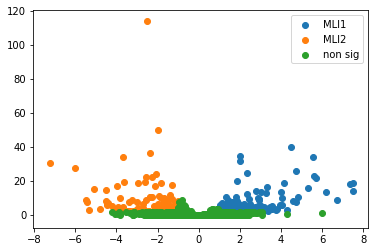

In [15]:
plt.scatter(df[df["category"] == cell_type1]["log2FoldChange"], -np.log10(df[df["category"] == cell_type1]["padj"]), label = cell_type1)
plt.scatter(df[df["category"] == cell_type2]["log2FoldChange"], -np.log10(df[df["category"] == cell_type2]["padj"]), label = cell_type2 )
plt.scatter(df[df["category"] == 0]["log2FoldChange"], -np.log10(df[df["category"] == 0]["padj"]), label = "non sig" )
plt.legend()

In [16]:
DE_genes = df[df["category"] != 0]
DE_genes

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
0,Luzp2,29.918272,-2.504310,0.108122,-23.161871,1.103788e-118,1.258208e-114,MLI2
1,Cntn6,8.908129,-1.973568,0.127000,-15.539884,1.863211e-54,1.061937e-50,MLI2
2,Adgrl3,27.222562,4.481079,0.321600,13.933716,3.952470e-44,1.501807e-40,MLI1
3,Grin2b,6.978202,-2.342798,0.175274,-13.366472,9.493824e-41,2.705502e-37,MLI2
4,Frmpd4,19.894972,1.994790,0.152946,13.042423,7.019020e-39,1.600196e-35,MLI1
...,...,...,...,...,...,...,...,...
305,Jun,1.676741,-3.070612,0.836355,-3.671420,2.412061e-04,8.985323e-03,MLI2
306,Agfg2,1.313943,-1.476118,0.403893,-3.654727,2.574556e-04,9.559402e-03,MLI2
307,C530008M17Rik,2.400341,1.554538,0.425582,3.652736,2.594605e-04,9.602567e-03,MLI1
308,Eps8,4.490132,-1.493697,0.409462,-3.647953,2.643383e-04,9.751433e-03,MLI2


# Map back to genome

In [17]:
meta_root = "/groups/CaiLab/personal/yujing/yodai_brain/jupyter_script/100k_files"
meta1 = pd.read_csv(os.path.join(data_path, "mm10_25kb_bins_genes_new.csv"), header = None).iloc[:, [0, 1, 2, 3, 5]]
meta1.columns = ["name", "chrom", "Start", "End", "gene"]
meta2 = pd.read_csv(os.path.join(data_path, "mm10_25kb_bins_genes.csv"), header = None).iloc[:, [0, 1, 2, 3, 6]]
meta2.columns = ["name", "chrom", "Start", "End", "gene"]
meta3 = pd.read_csv(os.path.join(data_path,
                                 "LC1-100k-000-008-annotation-of-100k-loci-with-all-genes-single-match.csv"))
meta3["gene"] = meta3["gene"].str.replace("-", ".")
meta3["gene"] = meta3["gene"].str.replace("March", "Marchf")
meta3["gene"] = meta3["gene"].str.replace("Sept", "Septin")

# Mismatch between DE gene naming and annotated namming

In [18]:
DE_sig_25kb = meta1.merge(DE_genes)

In [19]:
# missing genes
miss_genes = [x for x in DE_genes["gene"]  if x not in DE_sig_25kb["gene"].unique()]
print ("missing {} gene, {} of detected DE genes".format(len(miss_genes), len(miss_genes) / DE_genes.shape[0]) )

# missing gene are not trivial
miss_df = df[df["gene"].isin(miss_genes)]
miss_df

missing 4 gene, 0.016194331983805668 of detected DE genes


,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
138,X4930578G10Rik,7.256472,-1.632413,0.319117,-5.115400,3.130772e-07,0.000026,MLI2
139,A930011G23Rik,4.431177,-1.230021,0.240664,-5.110938,3.205627e-07,0.000026,MLI2
140,Lrrc16a,4.849156,-1.371400,0.270485,-5.070148,3.975065e-07,0.000032,MLI2
199,X9530026P05Rik,4.949001,1.550988,0.356385,4.352005,1.348980e-05,0.000761,MLI1


In [20]:
# first round of search
added_miss_gene2 = miss_df.merge(meta2)
added_miss_gene2

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category,name,chrom,Start,End


In [21]:
# check missing gene
# missing genes
miss_genes2 = [x for x in miss_genes  if x not in added_miss_gene2["gene"].unique()]
print ("missing {} gene, {} of detected DE genes".format(len(miss_genes2), len(miss_genes2) / DE_genes.shape[0]) )

# missing gene are not trivial
miss_df2 = df[df["gene"].isin(miss_genes2)]
miss_df2

missing 4 gene, 0.016194331983805668 of detected DE genes


,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category
138,X4930578G10Rik,7.256472,-1.632413,0.319117,-5.115400,3.130772e-07,0.000026,MLI2
139,A930011G23Rik,4.431177,-1.230021,0.240664,-5.110938,3.205627e-07,0.000026,MLI2
140,Lrrc16a,4.849156,-1.371400,0.270485,-5.070148,3.975065e-07,0.000032,MLI2
199,X9530026P05Rik,4.949001,1.550988,0.356385,4.352005,1.348980e-05,0.000761,MLI1


In [22]:
# Second round of search
added_miss_gene3 = miss_df2.merge(meta3)
added_miss_gene3

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,category,gene_ID,chrom,strand,gene_start,gene_end,name
0,A930011G23Rik,4.431177,-1.230021,0.240664,-5.110938,3.205627e-07,0.000026,MLI2,NR_030692,chr5,-,99297243,99729060,chr5-3853


In [23]:
# check missing gene
# missing genes
miss_genes3 = [x for x in miss_genes2  if x not in added_miss_gene3["gene"].unique()]
print ("missing {} gene, {} of detected DE genes".format(len(miss_genes3), len(miss_genes3) / DE_genes.shape[0]) )

# missing gene are not trivial
miss_df3 = df[df["gene"].isin(miss_genes3)]

missing 3 gene, 0.012145748987854251 of detected DE genes


# OK! tried our best to get all genes

In [24]:
DE_sig_25kb["200kb bin"] = DE_sig_25kb["Start"] // 200000
DE_sig_25kb["200kb name"] = DE_sig_25kb["chrom"] + "-g" + DE_sig_25kb["200kb bin"].astype(str)
added_miss_gene2["200kb bin"] = added_miss_gene2["Start"] // 200000
added_miss_gene2["200kb name"] = added_miss_gene2["chrom"] + "-g" + added_miss_gene2["200kb bin"].astype(str)

In [25]:
cols = ["200kb name","chrom", "200kb bin", "gene", "baseMean", "log2FoldChange", "pvalue", "padj", "category"]

In [26]:
DE_sig_200kb = pd.concat([DE_sig_25kb[cols], added_miss_gene2[cols]]).sort_values(by = ["chrom", "200kb bin"])

In [27]:
DE_sig_200kb_no_dup = DE_sig_200kb.drop_duplicates(subset=["gene", "200kb name"], keep='first')
DE_sig_200kb_no_dup

,200kb name,chrom,200kb bin,gene,baseMean,log2FoldChange,pvalue,padj,category
0,chr1-g106,chr1,106,Kcnq5,5.124169,2.468211,5.606552e-05,2.685256e-03,MLI1
1,chr1-g107,chr1,107,Kcnq5,5.124169,2.468211,5.606552e-05,2.685256e-03,MLI1
9,chr1-g108,chr1,108,Kcnq5,5.124169,2.468211,5.606552e-05,2.685256e-03,MLI1
17,chr1-g109,chr1,109,Kcnq5,5.124169,2.468211,5.606552e-05,2.685256e-03,MLI1
24,chr1-g190,chr1,190,Aff3,3.164571,1.391532,2.249246e-06,1.602447e-04,MLI1
...,...,...,...,...,...,...,...,...,...
2975,chrX-g838,chrX,838,Frmpd4,19.894972,1.994790,7.019020e-39,1.600196e-35,MLI1
2983,chrX-g839,chrX,839,Frmpd4,19.894972,1.994790,7.019020e-39,1.600196e-35,MLI1
2991,chrX-g840,chrX,840,Frmpd4,19.894972,1.994790,7.019020e-39,1.600196e-35,MLI1
2999,chrX-g841,chrX,841,Frmpd4,19.894972,1.994790,7.019020e-39,1.600196e-35,MLI1


In [28]:
# get norm counts
norm_counts = pd.read_csv(os.path.join(data_path, "ensembl_gene_counts_normalized.txt"), sep = "\t")

idx = (norm_counts.iloc[0].isin([cell_type1 ,cell_type2, "CLUSTER"])).values

norm_counts = norm_counts.iloc[:, idx]

# take a look
norm_counts.head()

/var/folders/j4/wgbmg2rn5q768jr012zxqngh0000gn/T/ipykernel_83368/3433087015.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122) have mixed types. Specify dtype option on import or set low_memory=False.
  norm_counts = pd.read_csv(os.path.join(data_path, "ensembl_gene_counts_normalized.txt"), sep = "\t")


,ID,VIIa_F002.8,VIIa_M002.9,VIIa_M006.9,VIIb_F002.8,VIIb_M002.7,VIIb_M006.8,VIIc_M002.8,VIId_M002.9,VIIa_F002.9,VIIa_M002.10,VIIa_M006.10,VIIb_F002.9,VIIb_M002.8,VIIb_M006.9,VIIc_M002.9,VIId_M002.10
0,CLUSTER,MLI1,MLI1,MLI1,MLI1,MLI1,MLI1,MLI1,MLI1,MLI2,MLI2,MLI2,MLI2,MLI2,MLI2,MLI2,MLI2
1,Xkr4,53.5948272840804,43.279884611744,61.2805288139014,41.5969990510138,49.2577139285487,53.8271418006571,59.7718668656137,62.6031475874452,35.7813610392684,51.5701938383856,50.6406486472937,45.3472958496567,42.5235798476236,31.6866266263668,50.0089097712685,27.8957333074462
2,Gm1992,5.62675352063836,8.41553311895023,7.47830182135745,5.25761326295341,5.61163829565745,4.61375501148489,10.3829064508343,12.0060830989621,5.01607865036473,6.01652261447832,9.2073906631443,4.65896875167706,13.8663847329208,0.7201506051447,12.7473691573822,10.7291281951716
3,Gm37381,0.140668838015959,0.300554754248222,0.207730606148818,0,0,0,0,0,0,0,0,0.31059791677847,0,0.36007530257235,0,0
4,Rp1,0,0,0.207730606148818,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
n1 = ["{}_{}".format(cell_type1, i) for i in range(1, 9)]
n2 = ["{}_{}".format(cell_type2, i) for i in range(1, 9)]

norm_counts.columns = ['gene'] + n1 + n2
norm_counts = norm_counts.iloc[1:].reset_index(drop = True)
norm_counts.head()
# turn dataframes to numeric
norm_counts[n1 + n2] = norm_counts[n1 + n2].apply(pd.to_numeric, errors='coerce')

In [30]:
norm_counts["{}_mean".format(cell_type1)] = norm_counts[n1].mean(axis=1)
norm_counts["{}_mean".format(cell_type2)] = norm_counts[n2].mean(axis=1)
norm_counts

,gene,MLI1_1,MLI1_2,MLI1_3,MLI1_4,MLI1_5,MLI1_6,MLI1_7,MLI1_8,MLI2_1,MLI2_2,MLI2_3,MLI2_4,MLI2_5,MLI2_6,MLI2_7,MLI2_8,MLI1_mean,MLI2_mean
0,Xkr4,53.594827,43.279885,61.280529,41.596999,49.257714,53.827142,59.771867,62.603148,35.781361,51.570194,50.640649,45.347296,42.523580,31.686627,50.008910,27.895733,53.151514,41.931794
1,Gm1992,5.626754,8.415533,7.478302,5.257613,5.611638,4.613755,10.382906,12.006083,5.016079,6.016523,9.207391,4.658969,13.866385,0.720151,12.747369,10.729128,7.424073,7.870249
2,Gm37381,0.140669,0.300555,0.207731,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310598,0.000000,0.360075,0.000000,0.000000,0.081119,0.083834
3,Rp1,0.000000,0.000000,0.207731,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025966,0.000000
4,Sox17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24404,Gm11426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24405,Calml3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24406,Gm2399,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24407,Gm29501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [31]:
# filter out DE genes get norm counts
DE_sig_200kb_no_dup = DE_sig_200kb_no_dup.merge(norm_counts[["gene","{}_mean".format(cell_type1), "{}_mean".format(cell_type2)]])
DE_sig_200kb_no_dup.to_csv(os.path.join(data_path, 
                                        "{}_{}_DE_sig_sum_200kb_no_dup.csv".format(cell_type1, cell_type2)), index = None)

In [32]:
DE_sig_200kb_no_dup

,200kb name,chrom,200kb bin,gene,baseMean,log2FoldChange,pvalue,padj,category,MLI1_mean,MLI2_mean
0,chr1-g106,chr1,106,Kcnq5,5.124169,2.468211,5.606552e-05,2.685256e-03,MLI1,4.785520,0.778046
1,chr1-g107,chr1,107,Kcnq5,5.124169,2.468211,5.606552e-05,2.685256e-03,MLI1,4.785520,0.778046
2,chr1-g108,chr1,108,Kcnq5,5.124169,2.468211,5.606552e-05,2.685256e-03,MLI1,4.785520,0.778046
3,chr1-g109,chr1,109,Kcnq5,5.124169,2.468211,5.606552e-05,2.685256e-03,MLI1,4.785520,0.778046
4,chr1-g190,chr1,190,Aff3,3.164571,1.391532,2.249246e-06,1.602447e-04,MLI1,7.287531,2.861286
...,...,...,...,...,...,...,...,...,...,...,...
578,chrX-g838,chrX,838,Frmpd4,19.894972,1.994790,7.019020e-39,1.600196e-35,MLI1,138.093827,34.523811
579,chrX-g839,chrX,839,Frmpd4,19.894972,1.994790,7.019020e-39,1.600196e-35,MLI1,138.093827,34.523811
580,chrX-g840,chrX,840,Frmpd4,19.894972,1.994790,7.019020e-39,1.600196e-35,MLI1,138.093827,34.523811
581,chrX-g841,chrX,841,Frmpd4,19.894972,1.994790,7.019020e-39,1.600196e-35,MLI1,138.093827,34.523811


In [33]:
temp = {"category" : ",".join, 
        "{}_mean".format(cell_type1) : sum,
        "{}_mean".format(cell_type2) : sum,
        "gene": ",".join}
final_200kb = DE_sig_200kb_no_dup.groupby("200kb name").agg(temp).reset_index()

In [34]:
final_200kb

,200kb name,category,MLI1_mean,MLI2_mean,gene
0,chr1-g106,MLI1,4.785520,0.778046,Kcnq5
1,chr1-g107,MLI1,4.785520,0.778046,Kcnq5
2,chr1-g108,MLI1,4.785520,0.778046,Kcnq5
3,chr1-g109,MLI1,4.785520,0.778046,Kcnq5
4,chr1-g190,MLI1,7.287531,2.861286,Aff3
...,...,...,...,...,...
569,chrX-g838,MLI1,138.093827,34.523811,Frmpd4
570,chrX-g839,MLI1,138.093827,34.523811,Frmpd4
571,chrX-g840,MLI1,138.093827,34.523811,Frmpd4
572,chrX-g841,MLI1,138.093827,34.523811,Frmpd4


In [35]:
# further format
final_200kb["chrom"]  = final_200kb["200kb name"].str.split("-").str[0]
# add small number to 0
final_200kb = final_200kb.replace(0, 0.05)
final_200kb 

,200kb name,category,MLI1_mean,MLI2_mean,gene,chrom
0,chr1-g106,MLI1,4.785520,0.778046,Kcnq5,chr1
1,chr1-g107,MLI1,4.785520,0.778046,Kcnq5,chr1
2,chr1-g108,MLI1,4.785520,0.778046,Kcnq5,chr1
3,chr1-g109,MLI1,4.785520,0.778046,Kcnq5,chr1
4,chr1-g190,MLI1,7.287531,2.861286,Aff3,chr1
...,...,...,...,...,...,...
569,chrX-g838,MLI1,138.093827,34.523811,Frmpd4,chrX
570,chrX-g839,MLI1,138.093827,34.523811,Frmpd4,chrX
571,chrX-g840,MLI1,138.093827,34.523811,Frmpd4,chrX
572,chrX-g841,MLI1,138.093827,34.523811,Frmpd4,chrX


In [36]:
# rank final output
final_200kb["chrom_id"] = final_200kb["chrom"].str[3:].replace("X", 20).astype(int)
final_200kb["group"] = final_200kb["200kb name"].str.split("-").str[1].str[1:].astype(int)
final_200kb = final_200kb.sort_values(by = ["chrom_id", "group"])
final_200kb["log2FC_{}2{}".format(cell_type1[:1], cell_type2[:1])] =  np.log2(final_200kb["{}_mean".format(cell_type1)].values / final_200kb["{}_mean".format(cell_type2)].values)
final_200kb

,200kb name,category,MLI1_mean,MLI2_mean,gene,chrom,chrom_id,group,log2FC_M2M
0,chr1-g106,MLI1,4.785520,0.778046,Kcnq5,chr1,1,106,2.620749
1,chr1-g107,MLI1,4.785520,0.778046,Kcnq5,chr1,1,107,2.620749
2,chr1-g108,MLI1,4.785520,0.778046,Kcnq5,chr1,1,108,2.620749
3,chr1-g109,MLI1,4.785520,0.778046,Kcnq5,chr1,1,109,2.620749
4,chr1-g190,MLI1,7.287531,2.861286,Aff3,chr1,1,190,1.348766
...,...,...,...,...,...,...,...,...,...
569,chrX-g838,MLI1,138.093827,34.523811,Frmpd4,chrX,20,838,1.999985
570,chrX-g839,MLI1,138.093827,34.523811,Frmpd4,chrX,20,839,1.999985
571,chrX-g840,MLI1,138.093827,34.523811,Frmpd4,chrX,20,840,1.999985
572,chrX-g841,MLI1,138.093827,34.523811,Frmpd4,chrX,20,841,1.999985


In [38]:
final_200kb["category"].value_counts()

MLI1         291
MLI2         274
MLI2,MLI2      5
MLI1,MLI1      3
MLI1,MLI2      1
Name: category, dtype: int64

In [39]:
final_200kb.to_csv(os.path.join(data_path, "{}_{}_DE_200kb_FoldChange.csv".format(cell_type1, cell_type2)), index = False)